# Importing Repositories

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import holidays
from scipy import stats
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=(20,10)

In [2]:
def missing_zero_values_table(df):
        ''''Takes a pandas dataframe and returns a statistics table that explains the missing and 
        zero values'''
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Our selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    
        return mz_table

# Importing data files

## Paths for files

In [3]:
path_price = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadPrices_12.1.D'
path_totalload = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadTotalLoadForecast'
path_windsolar = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadGenerationForecastForWindAndSolar_14.1.D'

## Price Timeseries Importing

In [4]:

df_price = pd.read_csv(r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\Data Frames\price_timeseries_outliers.csv', 
parse_dates=['DateTime'])


In [5]:
df_price = df_price[['DateTime', 'Year', 'Month','Week', 'Day', 'Hour', 'Price']]
df_price

,DateTime,Year,Month,Week,Day,Hour,Price
0,2015-01-01 00:00:00,2015,1,1,3,0,0.00
1,2015-01-01 01:00:00,2015,1,1,3,1,0.00
2,2015-01-01 02:00:00,2015,1,1,3,2,0.00
3,2015-01-01 03:00:00,2015,1,1,3,3,0.00
4,2015-01-01 04:00:00,2015,1,1,3,4,0.00
...,...,...,...,...,...,...,...
52529,2020-12-31 18:00:00,2020,12,53,3,18,71.30
52530,2020-12-31 19:00:00,2020,12,53,3,19,61.04
52531,2020-12-31 20:00:00,2020,12,53,3,20,60.39
52532,2020-12-31 21:00:00,2020,12,53,3,21,57.96


## Wind and Solar Timeseries Importing

In [6]:
f_windsolar = glob.glob(path_windsolar + "/*.csv")
dwindsolar = [pd.read_csv(f, sep='\t', parse_dates=['DateTime']) for f in f_windsolar]

df_windsolar = pd.concat(dwindsolar)
df_windsolar = df_windsolar[df_windsolar['AreaCode'] == '10YGB----------A']
df_windsolar = df_windsolar[['DateTime', 'ProductionType', 'AggregatedGenerationForecast']]
df_windsolar.sort_values(by='DateTime', ascending=True)
df_windsolar.reset_index(drop=True, inplace=True)

In [7]:
df_windsolar

,DateTime,ProductionType,AggregatedGenerationForecast
0,2014-12-30 00:00:00,Solar,0.00
1,2014-12-30 01:00:00,Solar,0.00
2,2014-12-30 02:00:00,Solar,0.00
3,2014-12-30 03:00:00,Solar,0.00
4,2014-12-30 04:00:00,Solar,0.00
...,...,...,...
509107,2021-06-14 19:00:00,Wind Offshore,1563.23
509108,2021-06-14 20:00:00,Wind Offshore,1590.47
509109,2021-06-14 21:00:00,Wind Offshore,1574.14
509110,2021-06-14 22:00:00,Wind Offshore,1450.72


### Splitting the WindSolar Dataset into 3 Datasets per Solar, Wind Offshore, Wind Onshore

In [8]:
df_windsolar['ProductionType'].unique()

array(['Solar', 'Wind Offshore', 'Wind Onshore'], dtype=object)

In [9]:
df_solar = df_windsolar[df_windsolar['ProductionType'] == 'Solar']
df_solar.sort_values(by='DateTime', ascending=True)
df_solar.reset_index(drop=True, inplace=True)
df_solar.rename(columns={'AggregatedGenerationForecast':'SolarGeneration'}, inplace=True)
df_solar = df_solar[['DateTime','SolarGeneration']]
df_solar

,DateTime,SolarGeneration
0,2014-12-30 00:00:00,0.0
1,2014-12-30 01:00:00,0.0
2,2014-12-30 02:00:00,0.0
3,2014-12-30 03:00:00,0.0
4,2014-12-30 04:00:00,0.0
...,...,...
169699,2021-06-14 19:00:00,227.0
169700,2021-06-14 20:00:00,11.5
169701,2021-06-14 21:00:00,0.0
169702,2021-06-14 22:00:00,0.0


In [10]:
df_wind_off = df_windsolar[df_windsolar['ProductionType'] == 'Wind Offshore']
df_wind_off.sort_values(by='DateTime', ascending=True)
df_wind_off.reset_index(drop=True, inplace=True)
df_wind_off.rename(columns={'AggregatedGenerationForecast':'WindOffGeneration'}, inplace=True)
df_wind_off = df_wind_off[['DateTime', 'WindOffGeneration']]
df_wind_off

,DateTime,WindOffGeneration
0,2014-12-30 00:00:00,996.58
1,2014-12-30 01:00:00,1059.20
2,2014-12-30 02:00:00,1123.27
3,2014-12-30 03:00:00,1177.54
4,2014-12-30 04:00:00,1188.21
...,...,...
169699,2021-06-14 19:00:00,1563.23
169700,2021-06-14 20:00:00,1590.47
169701,2021-06-14 21:00:00,1574.14
169702,2021-06-14 22:00:00,1450.72


In [11]:
df_wind_on = df_windsolar[df_windsolar['ProductionType'] == 'Wind Onshore']
df_wind_on.sort_values(by='DateTime', ascending=True)
df_wind_on.reset_index(drop=True, inplace=True)
df_wind_on.rename(columns={'AggregatedGenerationForecast':'WindOnGeneration'}, inplace=True)
df_wind_on = df_wind_on[['DateTime','WindOnGeneration']]
df_wind_on

,DateTime,WindOnGeneration
0,2014-12-30 00:00:00,2363.80
1,2014-12-30 01:00:00,2413.88
2,2014-12-30 02:00:00,2450.75
3,2014-12-30 03:00:00,2500.78
4,2014-12-30 04:00:00,2536.07
...,...,...
169699,2021-06-14 19:00:00,4896.71
169700,2021-06-14 20:00:00,3928.19
169701,2021-06-14 21:00:00,3277.03
169702,2021-06-14 22:00:00,2880.91


# Merging Datasets

In [12]:
# Merging Price, Solar Generation, Wind offshore and Wind onshore generation datasets to one

df_merged = pd.merge(df_price, df_solar, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_off, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_on, how='left', on='DateTime')
df_merged.drop_duplicates(subset=['DateTime'], keep='first', inplace=True)
df_model = pd.DataFrame()
df_model = df_merged[['Price','Year', 'Month', 'Day', 'Hour', 'SolarGeneration', 'WindOffGeneration',
'WindOnGeneration']]
df_model.set_index(df_merged['DateTime'], inplace=True)
df_model

,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration
DateTime,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,2987.05,4013.58
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,2926.71,4074.53
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,2867.00,4157.48
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,2808.72,4229.50
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,2769.59,4133.56
...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,2644.97,3028.41
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,2707.55,3046.72
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,2695.01,3053.60


## Transforming Solar, Wind Onshore and Wind Offshore Generation values

In [13]:
# Apply square root transformation to our predictors in order to have the scale with our dependent variable (Price)

df_model['SolarGeneration'] = df_model['SolarGeneration'].transform('sqrt')
df_model['WindOffGeneration'] = df_model['WindOffGeneration'].transform('sqrt')
df_model['WindOnGeneration'] = df_model['WindOnGeneration'].transform('sqrt')

# Creating lags - 2-weeks-lags

In [14]:
def lag_col(df, variable, lags):
    '''
        Takes in a pandas dataframe, a specific variable of the dataset and number of lags as a list
        and returns the df updated with the lags of the variable
        
        Parameters:
            df: pandas dataframe
            variable: string
            lags: list
        
        Returns:
            Adds column for every lag inside the list for our designated variable
        
        '''


    for lag in lags:
        df[str(variable) + '_' + str(lag)] = df[variable].shift(lag)
    return df

In [15]:
lags = list(range(1,336)) # 2-week-lags

In [16]:
lag_col(df_model, 'Price', lags)
lag_col(df_model, 'SolarGeneration', lags)
lag_col(df_model, 'WindOffGeneration', lags)
lag_col(df_model, 'WindOnGeneration', lags)


,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,54.653911,63.352822,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,54.099076,63.832045,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,53.544374,64.478524,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,52.997358,65.034606,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,52.626894,64.292768,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,51.429272,55.030991,106.50,76.00,...,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787,85.768642,83.917936
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,52.034123,55.197101,71.30,106.50,...,74.480064,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787,85.768642
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,51.913486,55.259388,61.04,71.30,...,73.915695,74.480064,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787


# Re-forming our dataset

## Creating single-hour data blocks

In [17]:
df_model.dropna(inplace=True) # Clearing na values

#Create multi-dataframe that will have every single dataset regarding the time of the day

hours = df_model['Hour'].unique().tolist()
df_hour ={hour: pd.DataFrame() for hour in hours}
for i in range(len(hours)):
    df_hour[i] = df_model[df_model['Hour'] == i]
    df_hour[i] = df_hour[i][(np.abs(stats.zscore(df_hour[i]['Price']))<3)]


# Example of the dataset of 00:00    
df_hour[0]


,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-16,32.14,2015,1,4,0,0.0,55.447182,85.482805,32.27,0.00,...,70.690593,70.416120,71.065463,71.777643,72.254827,72.374581,72.519377,72.603443,72.912276,73.184698
2015-01-17,35.57,2015,1,5,0,0.0,49.436019,51.984132,34.92,37.90,...,34.457365,36.234238,37.987893,40.228970,43.426835,48.417662,53.901020,58.642647,61.652737,63.449744
2015-01-18,39.06,2015,1,6,0,0.0,26.366077,36.817795,40.00,38.95,...,37.609972,37.259898,36.469302,35.555450,34.700576,33.975874,33.104380,32.289782,31.850275,31.527290
2015-01-19,35.44,2015,1,0,0,0.0,38.227739,44.782809,35.01,35.09,...,51.293274,51.021662,50.670406,50.487028,50.145289,49.360105,48.514740,48.293995,48.496598,48.553785
2015-01-20,34.21,2015,1,1,0,0.0,14.527560,24.740251,34.03,39.00,...,48.676278,48.989999,50.983233,52.457697,53.990555,55.977495,57.971976,59.715408,59.583303,59.051164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.70,2020,12,6,0,0.0,98.853933,88.450438,2.74,22.60,...,82.875087,79.668375,75.296680,70.293883,64.691808,60.170258,54.845510,50.028692,45.649096,41.076027
2020-12-28,56.00,2020,12,0,0,0.0,61.641950,47.702096,42.00,64.40,...,75.342684,75.941754,76.315136,77.130344,78.079127,79.319796,80.540300,81.518894,81.904945,81.883271
2020-12-29,64.95,2020,12,1,0,0.0,34.614737,40.164039,63.99,51.40,...,61.735160,61.796359,62.376999,62.826348,63.588442,64.779858,65.508854,66.554940,67.270053,67.715065


In [18]:
# Dropping unwanted features for every single dataset and dropping the nan values
for i in range(len(hours)):
    df_hour[i].drop(columns=['Year','Day','Month','Hour'], inplace=True)
    df_hour[i].dropna(inplace=True)

# Example of data frame regarding the 23:00 data frame
df_hour[23]

,Price,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-15 23:00:00,32.27,0.0,44.419928,68.855646,0.00,0.00,0.00,0.00,0.00,0.00,...,70.416120,71.065463,71.777643,72.254827,72.374581,72.519377,72.603443,72.912276,73.184698,73.214411
2015-01-16 23:00:00,34.92,0.0,43.226612,62.133646,37.90,40.96,54.99,50.00,51.87,69.05,...,36.234238,37.987893,40.228970,43.426835,48.417662,53.901020,58.642647,61.652737,63.449744,65.199233
2015-01-17 23:00:00,40.00,0.0,32.059632,41.775471,38.95,38.98,42.21,44.97,59.19,74.96,...,37.259898,36.469302,35.555450,34.700576,33.975874,33.104380,32.289782,31.850275,31.527290,31.585440
2015-01-18 23:00:00,35.01,0.0,37.492533,42.639770,35.09,42.03,42.97,44.49,55.05,72.03,...,51.021662,50.670406,50.487028,50.145289,49.360105,48.514740,48.293995,48.496598,48.553785,48.506288
2015-01-19 23:00:00,34.03,0.0,18.648592,24.622957,39.00,40.50,44.59,50.83,65.00,91.12,...,48.989999,50.983233,52.457697,53.990555,55.977495,57.971976,59.715408,59.583303,59.051164,58.826100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 23:00:00,49.40,0.0,81.688800,77.979228,46.20,49.20,54.24,58.16,49.64,52.95,...,42.891957,43.211688,43.287989,43.348472,43.945648,44.082876,44.122670,43.942349,43.489999,43.324704
2020-12-27 23:00:00,42.00,0.0,47.064955,42.775811,64.40,64.90,58.70,70.00,75.86,86.80,...,75.941754,76.315136,77.130344,78.079127,79.319796,80.540300,81.518894,81.904945,81.883271,81.361785
2020-12-28 23:00:00,63.99,0.0,44.310721,43.196296,51.40,60.94,56.06,72.01,72.70,99.93,...,61.796359,62.376999,62.826348,63.588442,64.779858,65.508854,66.554940,67.270053,67.715065,68.057990


# Lasso Model

## Dataset Split

In [19]:
# Splitting every dataset for our dependent and independent variables 

X = {hour: pd.DataFrame() for hour in hours}
y = {hour: pd.DataFrame() for hour in hours}
for hour in range(len(hours)):
    X[hour] = df_hour[hour].drop(columns='Price')
    y[hour] = df_hour[hour].Price

## Lasso Regressor and TimeSeriesSplit

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit

# Creating the object that will be used during the cross-validation, with 5 folds
tscv = TimeSeriesSplit(n_splits=5)


# Create empty dataframes with hour as index in order to fill the trained models, and train them accordingly
model = {hour: pd.DataFrame() for hour in hours}



# We will traing every model for every hour, and we generate a data frame that will inform us about the r-squared,
# alpha value and intercept for every model

rsquared = []
alphaval = []
model_name = []
intercept = []


for hour in hours:
    model[hour] = LassoCV(cv=tscv, random_state=0).fit(X[hour],y[hour])
    rsquared.append(model[hour].score(X[hour], y[hour]))
    alphaval.append(model[hour].alpha_)
    intercept.append(model[hour].intercept_)
    model_name.append('model[' + str(hour) + ']')

model_results = pd.DataFrame(columns=['Model', 'Rsquared Value', 'Alpha Value', 'Intercept'])
model_results['Model'] = model_name
model_results['Rsquared Value'] = rsquared
model_results['Alpha Value'] = alphaval
model_results['Intercept'] = intercept


# Table that shows the results for every trained model
model_results

,Model,Rsquared Value,Alpha Value,Intercept
0,model[23],0.856062,1.270750,3.733090
1,model[0],0.928295,1.627664,0.812505
2,model[1],0.942651,1.004292,1.276833
3,model[2],0.942201,1.229904,-1.070108
4,model[3],0.947098,1.577513,-2.081808
5,model[4],0.921932,1.188031,-2.283220
6,model[5],0.904549,2.568159,1.452096
7,model[6],0.860304,4.351120,2.522407
8,model[7],0.859623,3.720464,3.711977
9,model[8],0.899424,2.687107,5.761857


In [21]:
# Create multi data frame that will inform us about its coefficients with a descending order

df_coef = {hour: pd.DataFrame() for hour in hours}
for hour in hours:
    df_coef[hour].index = X[hour].transpose().index
    df_coef[hour]['Coefficients'] = model[hour].coef_.transpose()
    df_coef[hour].sort_values(by='Coefficients', ascending=False, inplace=True)
    df_coef[hour]

# Example of coefficient table of our top 10 coefficients for hour 8:00
a = df_coef[8].head(10)


Text(0.5, 0, 'Coefficients')

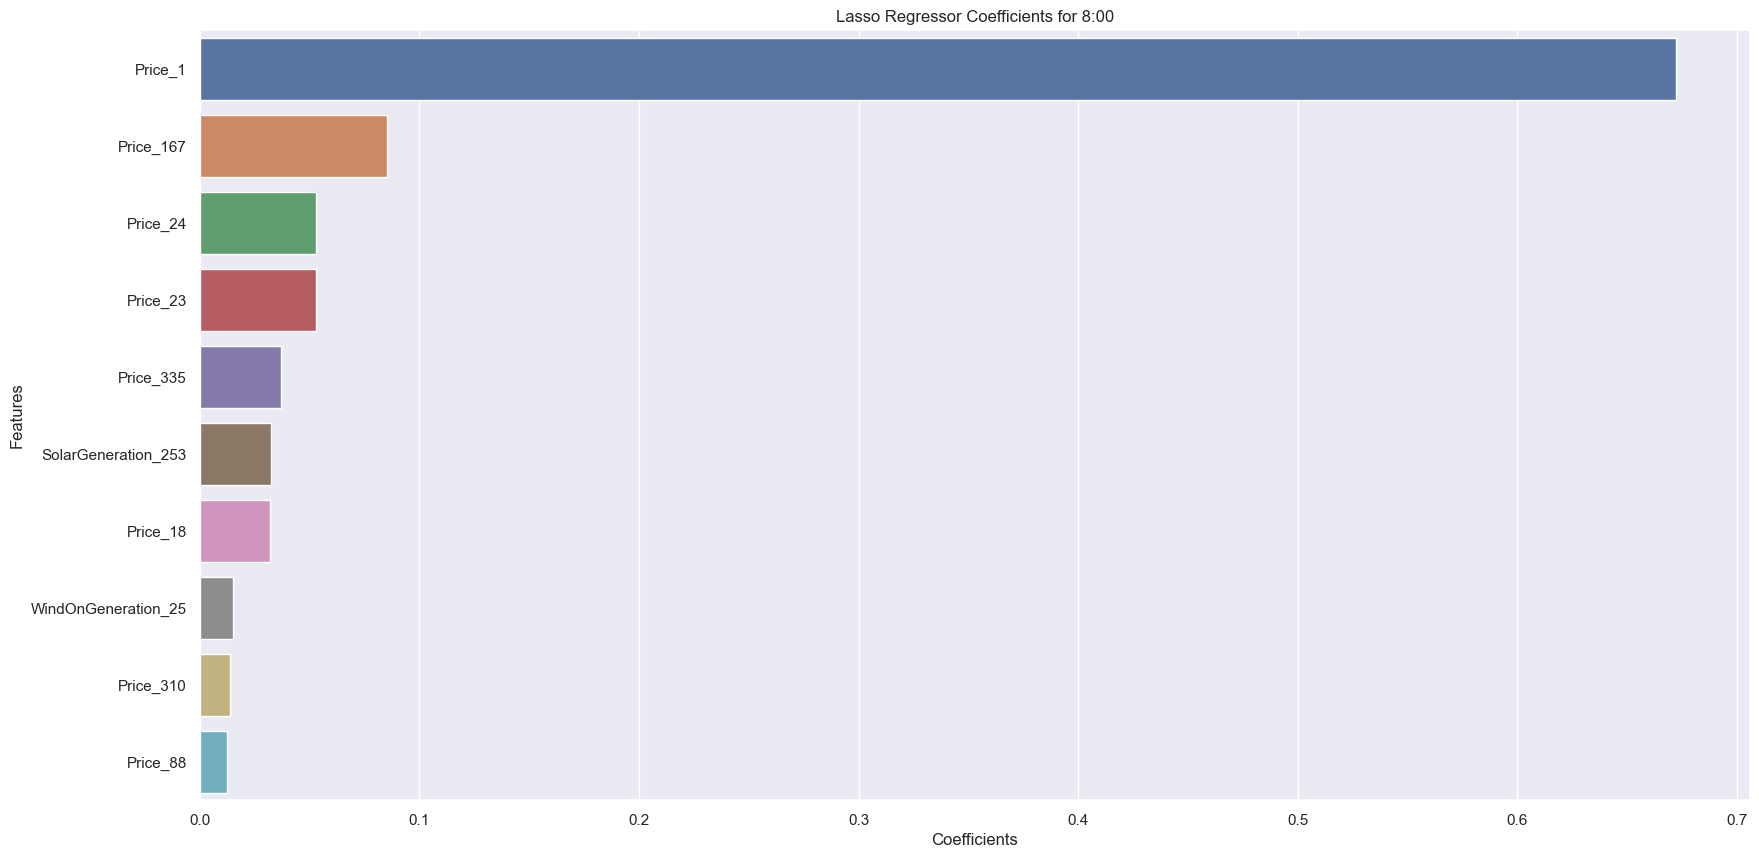

In [22]:
# Barplot for top 10 coeffiecients (features) for hour 8:00

sns.barplot(x=a['Coefficients'],y=a.index )
plt.title('Lasso Regressor Coefficients for 8:00')
plt.ylabel('Features')
plt.xlabel('Coefficients')

In [23]:
# Create multi data frame that will provides us with the residuals and squared residuals for every trained model, 
# for every hour


lasso = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    lasso[hour] = pd.DataFrame(columns=['Actual Value', 'Predicted Value', 'Residual', 'Squared Residuals'])
    lasso[hour]['Actual Value'] = y[hour]
    lasso[hour]['Predicted Value'] = model[hour].predict(X[hour])
    lasso[hour]['Residual'] = lasso[hour]['Actual Value'] - lasso[hour]['Predicted Value']
    lasso[hour]['Squared Residuals'] = lasso[hour]['Residual'].mul(lasso[hour]['Residual'])


# Example of the table
lasso[15]

,Actual Value,Predicted Value,Residual,Squared Residuals
DateTime,,,,
2015-01-16 15:00:00,36.02,35.130491,0.889509,0.791227
2015-01-17 15:00:00,34.41,35.615913,-1.205913,1.454227
2015-01-18 15:00:00,36.00,36.517933,-0.517933,0.268255
2015-01-19 15:00:00,37.07,40.583010,-3.513010,12.341242
2015-01-20 15:00:00,38.15,38.961650,-0.811650,0.658776
...,...,...,...,...
2020-12-27 15:00:00,50.70,51.058560,-0.358560,0.128565
2020-12-28 15:00:00,48.19,59.155847,-10.965847,120.249796
2020-12-29 15:00:00,53.76,53.938663,-0.178663,0.031920


## Garch Model

## Working an example

In [271]:
from arch import arch_model

# Using arch_lasso_exp as an example, variable b takes an int number pointing the hour 
# we want to produce the arch model

b = 0

arch_lasso_exp = arch_model(lasso[b]['Residual'], vol='GARCH', p=1,q=1, dist='gaussian', mean='Constant')
arch_lasso_exp = arch_lasso_exp.fit()
arch_lasso_exp.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8615.585584124256
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5251.799589723507
Iteration:      3,   Func. Count:     21,   Neg. LLF: 9438510.613183426
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5166.54818252666
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5158.9874009407995
Iteration:      6,   Func. Count:     39,   Neg. LLF: 5158.986267455392
Iteration:      7,   Func. Count:     44,   Neg. LLF: 5158.986253801183
Iteration:      8,   Func. Count:     49,   Neg. LLF: 5158.986249927656
Iteration:      9,   Func. Count:     53,   Neg. LLF: 5158.98624992764
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5158.986249927656
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               Residual   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5158.99
Distribution:                  Normal   AIC:                           10326.0
Method:            Maximum Likelihood   BIC:                           10348.6
                                        No. Observations:                 2140
Date:                Mon, Jan 30 2023   Df Residuals:                     2139
Time:                        15:50:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0488  6.780e-02     -0.719      0.472 [ -0.182,8.413e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.1977      1.063      3.949  7.840e-05    [  2.114,  6.281]
alpha[1]       0.2615  8.423e-02      3.104  1.908e-03  [9.638e-02,  0.427]
beta[1]        0.2287      0.129      1.779  7.525e-02 [-2.327e-02,  0.481]
===========================================================================

Covariance estimator: robust
"""

Text(0.5, 1.0, 'Volatility for 0:00')

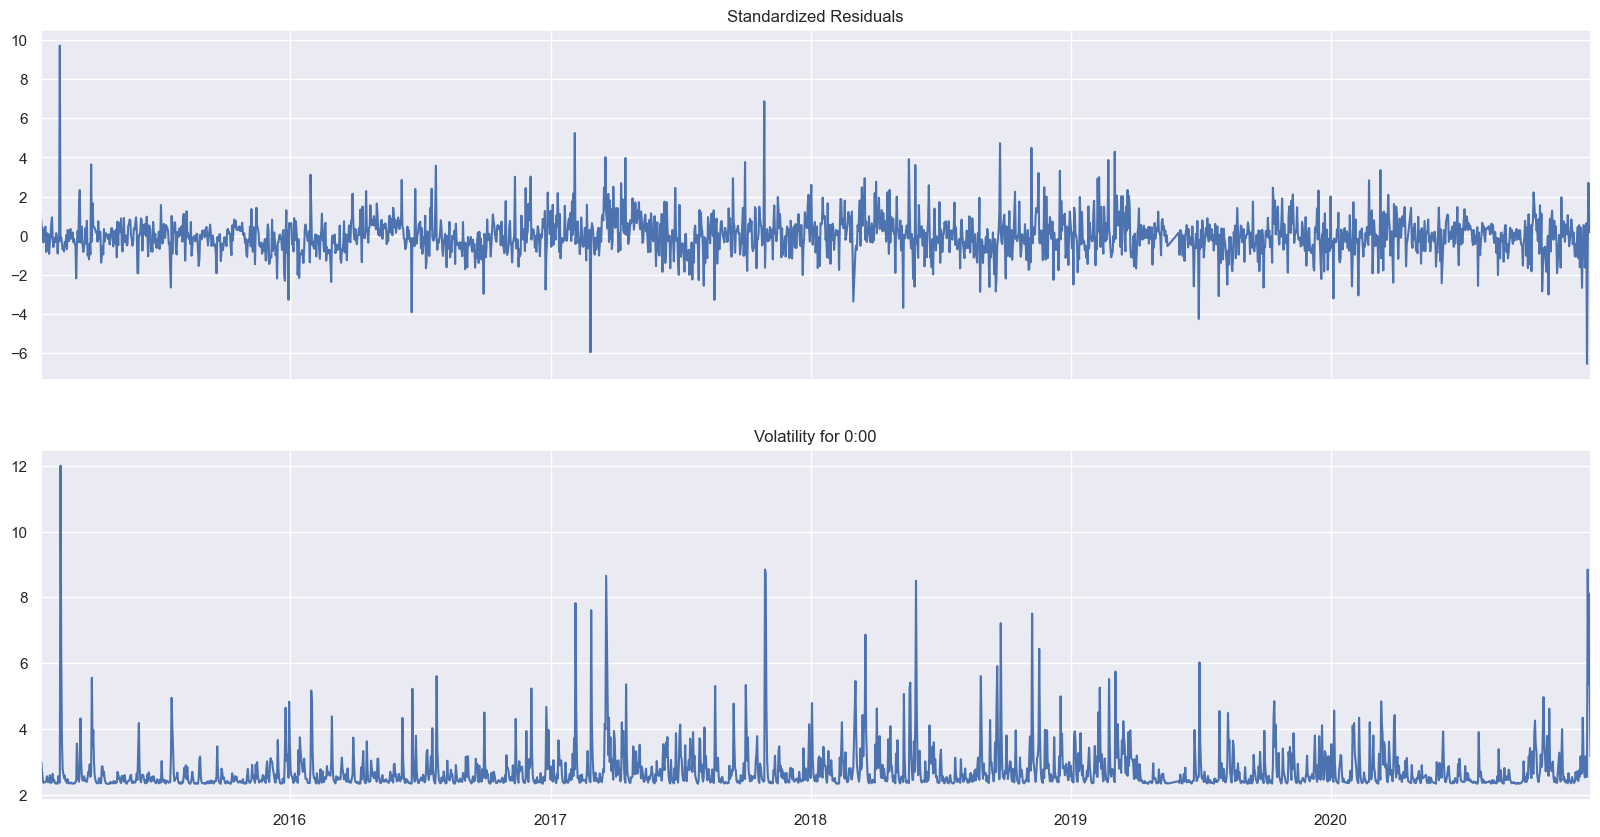

In [272]:
# Producing conditional volatility plot for our garch model

arch_lasso_exp.plot();
plt.title('Volatility for ' + str(b) + ':00')


Text(0.5, 1.0, 'Distribution of Standardized Residuals for GARCH(1,1) - 0:00')

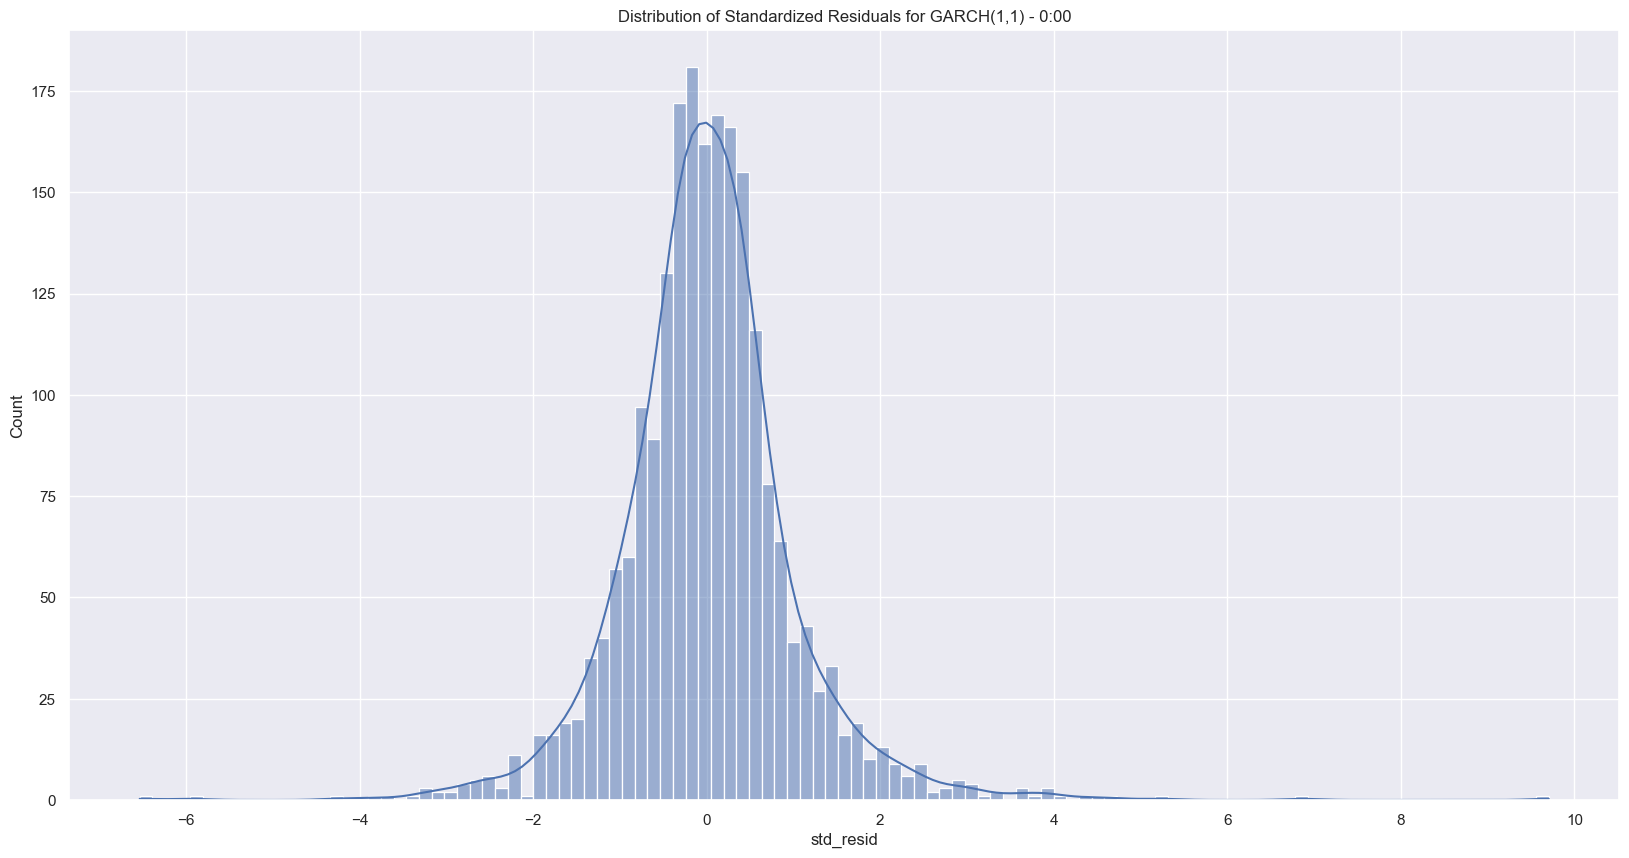

In [273]:
# Plotting the standardized residuals of our garch model

sns.histplot(arch_lasso_exp.std_resid, kde=True)
plt.title('Distribution of Standardized Residuals for GARCH(1,1) - ' + str(b) + ':00')

Text(0.5, 1.0, 'QQplot for Standardized Residuals - GARCH(1,1) 0:00')

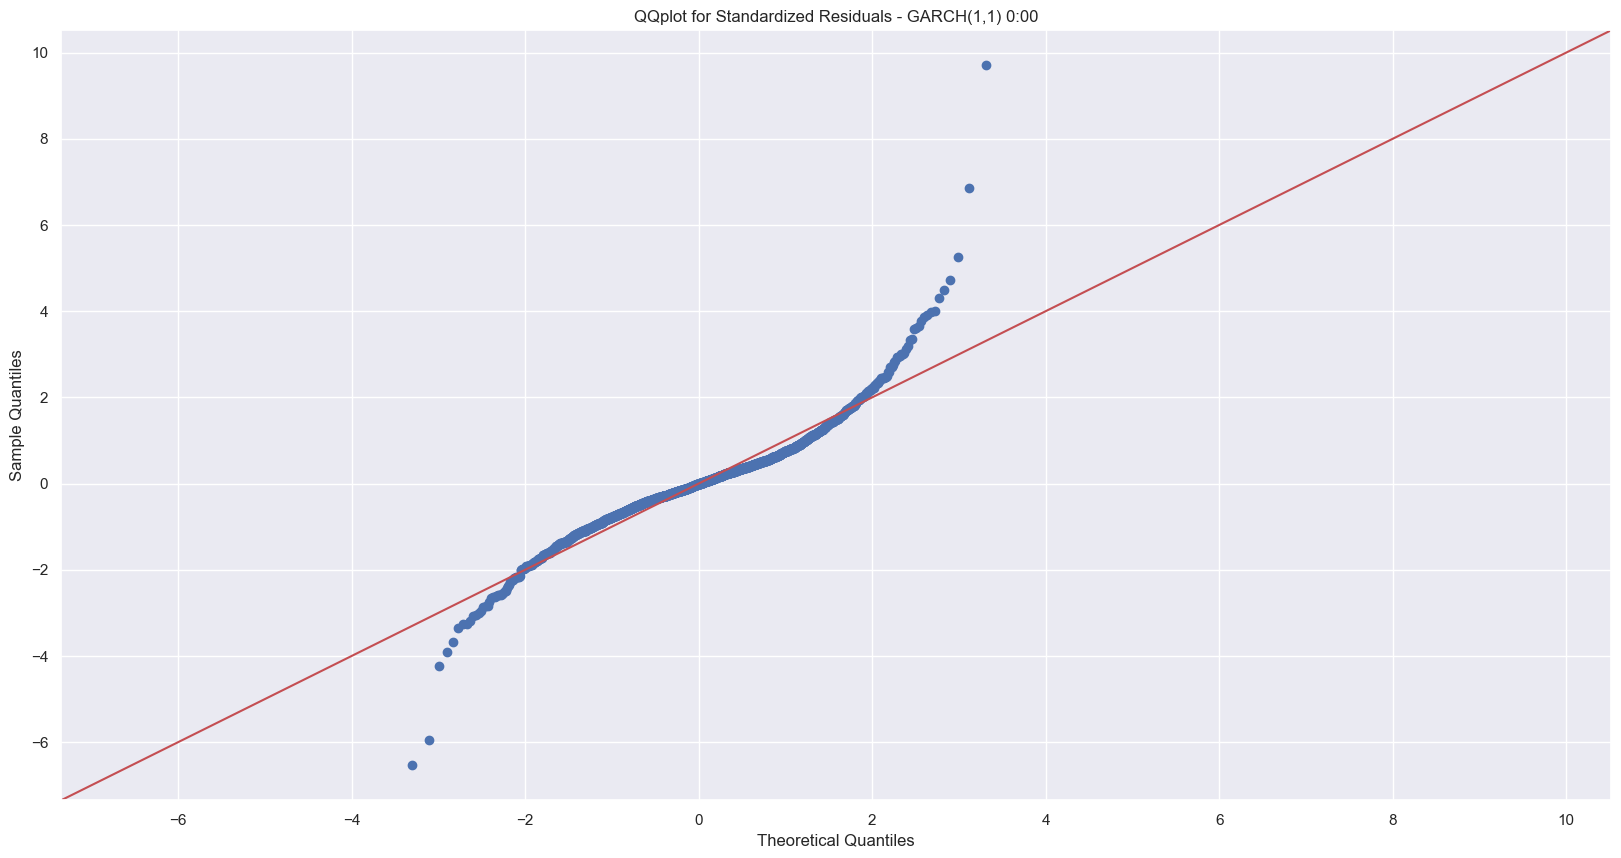

In [274]:
# Plotting the qqplot of our standardized residuals

import statsmodels.api as sm
from scipy.stats import norm
import pylab

x = arch_lasso_exp.std_resid
sm.qqplot(x, line='45')

plt.title('QQplot for Standardized Residuals - GARCH(1,1) ' + str(b) + ':00')

## Training every model

In [275]:
# Training every garch model for every hour ( takes the residuals from our trained lasso models)

from scipy import stats
garch_lasso = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    garch_lasso[hour] = arch_model(lasso[hour]['Residual'], vol='GARCH', p=1,q=1, mean='Constant').fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15575.365464590242
Iteration:      2,   Func. Count:     14,   Neg. LLF: 10778.362164926297
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5740.965430005327
Iteration:      4,   Func. Count:     29,   Neg. LLF: 5726.75828224788
Iteration:      5,   Func. Count:     35,   Neg. LLF: 5744.782306775021
Iteration:      6,   Func. Count:     41,   Neg. LLF: 5722.978433105556
Iteration:      7,   Func. Count:     47,   Neg. LLF: 5722.619022945641
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5722.614406401789
Iteration:      9,   Func. Count:     58,   Neg. LLF: 5722.614133907177
Iteration:     10,   Func. Count:     63,   Neg. LLF: 5722.614125044534
Iteration:     11,   Func. Count:     68,   Neg. LLF: 5722.614118204869
Iteration:     12,   Func. Count:     72,   Neg. LLF: 5722.614118205186
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5722.614118204869
            Iterations: 12


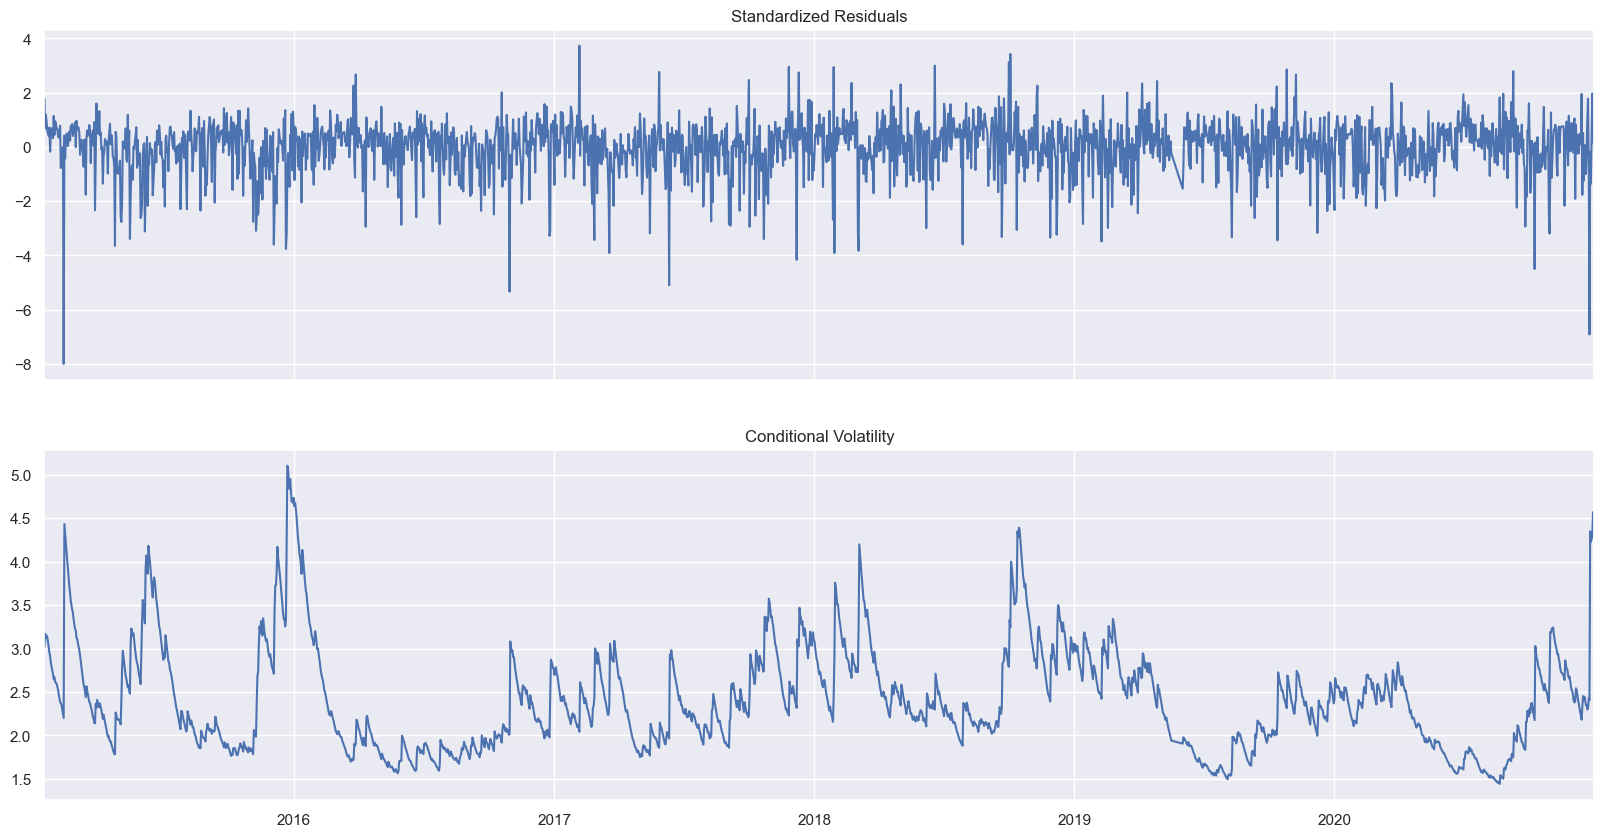

In [276]:
fig = garch_lasso[2].plot()

# Evaluation Metrics

In [277]:
df_results = {hour: pd.DataFrame() for hour in hours}


for hour in hours:
    df_results[hour] = pd.merge(df_hour[hour][['Price', 'SolarGeneration', 'WindOffGeneration', 'WindOnGeneration']], 
                                     lasso[hour]['Predicted Value'],  
                                     how='left',
                                     right_index=True,
                                     left_index=True)
    df_results[hour]['sigma'] = garch_lasso[hour].conditional_volatility
    

## Reliability Diagram

In [278]:
h = 10

quantiles = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

x_q = []
y_f = []

for q in quantiles:
    x_q.append(q)
    y_f.append(len(df_results[h][df_results[h]['Price'] <= np.quantile(df_results[h]['Predicted Value'], q)]) / len(df_results[h]))

Text(0, 0.5, 'Observed Relative Frequency')

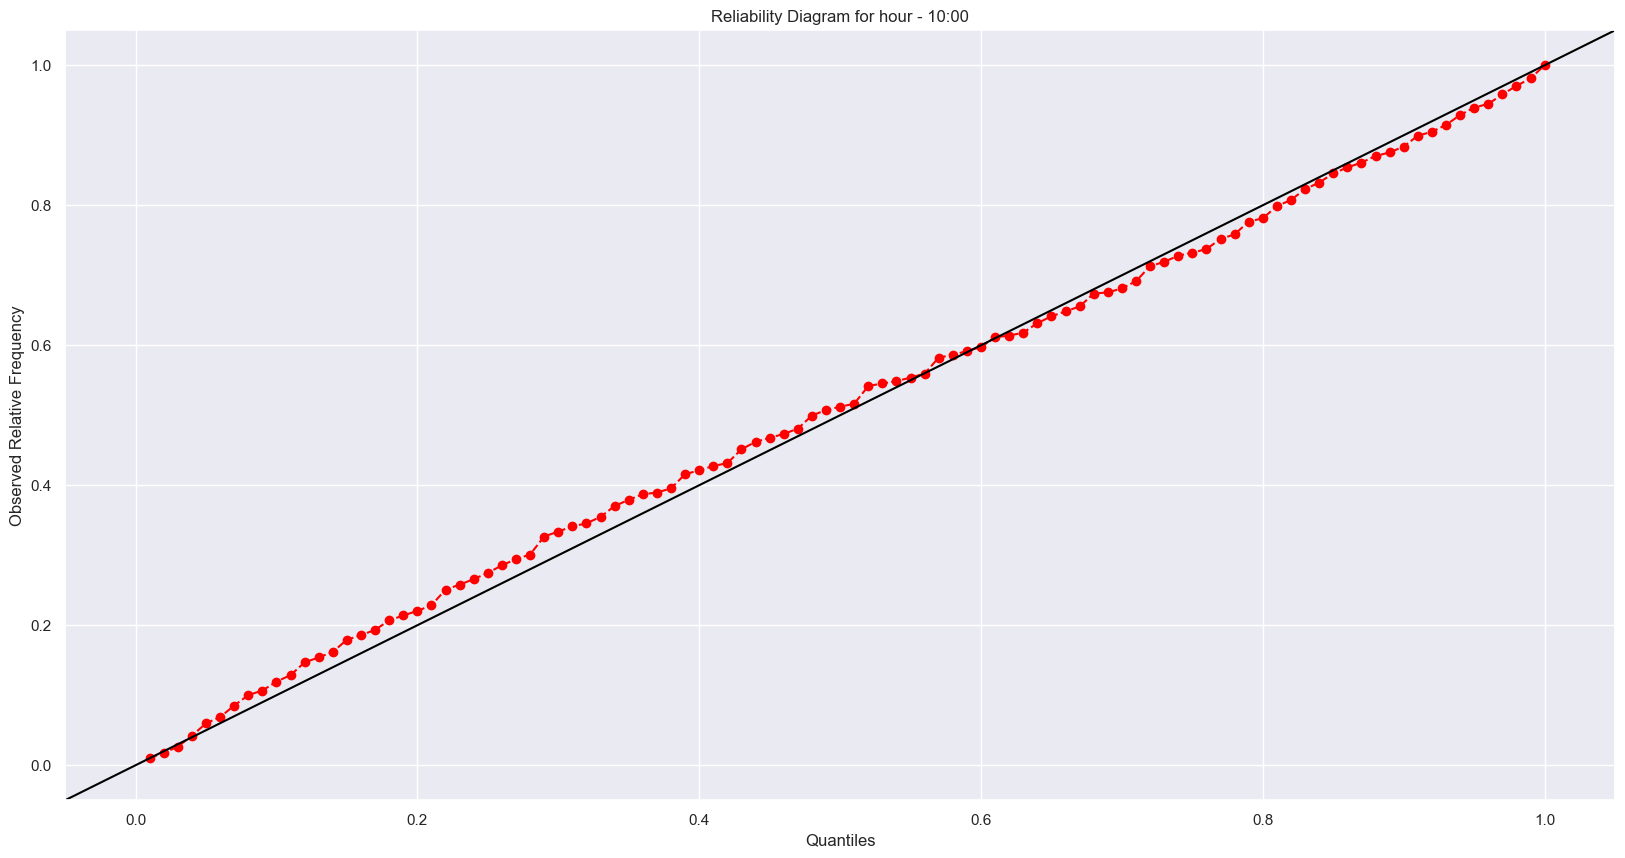

In [279]:
plt.plot(x_q, y_f, color='red', linestyle='dashed', marker='o')
plt.axline((0,0), slope=1, color='black')
plt.title('Reliability Diagram for hour - ' + str(h) + ':00')
plt.xlabel('Quantiles')
plt.ylabel('Observed Relative Frequency')

## CRPS

In [280]:
import properscoring as ps

for hour in hours:
    crps_score = []
    for i in range(len(df_results[hour])):
        crps_score.append(ps.crps_gaussian(df_results[hour].iloc[i,0], mu=df_results[hour].iloc[i,4], sig=df_results[hour].iloc[i,5]))
    df_results[hour]['CRPS'] = crps_score

In [281]:
# Example

df_results[1]

,Price,SolarGeneration,WindOffGeneration,WindOnGeneration,Predicted Value,sigma,CRPS
DateTime,,,,,,,
2015-01-16 01:00:00,31.71,0.0,55.582551,85.283527,28.141159,2.151298,2.442011
2015-01-17 01:00:00,34.90,0.0,49.332140,50.393849,34.066109,2.797678,0.752234
2015-01-18 01:00:00,38.25,0.0,23.206896,38.310442,37.745080,2.331941,0.588409
2015-01-19 01:00:00,35.78,0.0,37.360541,42.251035,35.611728,2.176476,0.513819
2015-01-20 01:00:00,34.43,0.0,15.165751,25.496470,34.018324,2.123135,0.527912
...,...,...,...,...,...,...,...
2020-12-26 01:00:00,24.55,0.0,82.841415,75.948996,30.710966,3.469627,4.308727
2020-12-28 01:00:00,62.00,0.0,57.709445,46.271265,50.470660,4.054208,9.247320
2020-12-29 01:00:00,63.98,0.0,36.362343,40.850459,60.929142,6.526222,2.083980


## Pinball Loss

In [282]:
norm.ppf(0.8, loc=28.14, scale=2.15)

29.949485652181767

In [283]:
def pinball_loss(q, obs, m, s):
    if obs < norm.ppf(q, loc=m, scale=s):
        pl = (1-q)*(norm.ppf(q, loc=m, scale=s) - obs)
    elif obs >= norm.ppf(q, loc=m, scale=s):
        pl = q*(obs - norm.ppf(q, loc=m, scale=s))
    return pl


In [284]:
pinball_loss(0.5, 32.14, 28.8, 2.88)

1.67

In [285]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for quant in quantiles:
    for hour in hours:
        pin_loss = []
        for i in range(len(df_results[hour])):
            pin_loss.append(pinball_loss(q=quant,obs = df_results[hour].iloc[i,0], m = df_results[hour].iloc[i,4], s = df_results[hour].iloc[i,5]))
        df_results[hour]['PL ' + str(quant*100) + '%'] = pin_loss   



In [286]:
df_results[0]

,Price,SolarGeneration,WindOffGeneration,WindOnGeneration,Predicted Value,sigma,CRPS,PL 10.0%,PL 20.0%,PL 30.0%,PL 40.0%,PL 50.0%,PL 60.0%,PL 70.0%,PL 80.0%,PL 90.0%
DateTime,,,,,,,,,,,,,,,,
2015-01-16,32.14,0.0,55.447182,85.482805,28.875897,2.887799,2.007979,0.696497,1.138907,1.433540,1.598287,1.632052,1.519493,1.224818,0.666937,0.043676
2015-01-17,35.57,0.0,49.436019,51.984132,33.377056,2.995794,1.313371,0.603221,0.942854,1.129182,1.180768,1.096472,0.860381,0.435363,0.065676,0.164632
2015-01-18,39.06,0.0,26.366077,36.817795,38.178945,2.750355,0.754388,0.440578,0.639162,0.697003,0.631140,0.440527,0.110556,0.168370,0.286740,0.264367
2015-01-19,35.44,0.0,38.227739,44.782809,35.319912,2.480722,0.582051,0.329926,0.441583,0.426294,0.299429,0.060044,0.203358,0.354241,0.393548,0.305909
2015-01-20,34.21,0.0,14.527560,24.740251,35.048835,2.369126,0.670919,0.219732,0.231014,0.121061,0.143174,0.419417,0.575619,0.624362,0.566548,0.387499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.70,0.0,98.853933,88.450438,9.792006,8.842151,3.204926,0.623967,0.469947,0.318624,1.711124,2.546003,2.932856,2.918650,2.506750,1.642368
2020-12-28,56.00,0.0,61.641950,47.702096,41.527331,5.360179,11.459875,2.134201,3.796782,5.185065,6.332262,7.236334,7.868810,8.163252,7.969142,6.842990
2020-12-29,64.95,0.0,34.614737,40.164039,60.529004,8.118220,2.834618,1.482491,2.250692,2.603458,2.591089,2.210498,1.418561,0.114658,0.482294,0.598292


In [287]:
df_test = df_results[0].describe().transpose()
df_test = df_test.tail(9)

<AxesSubplot:ylabel='mean'>

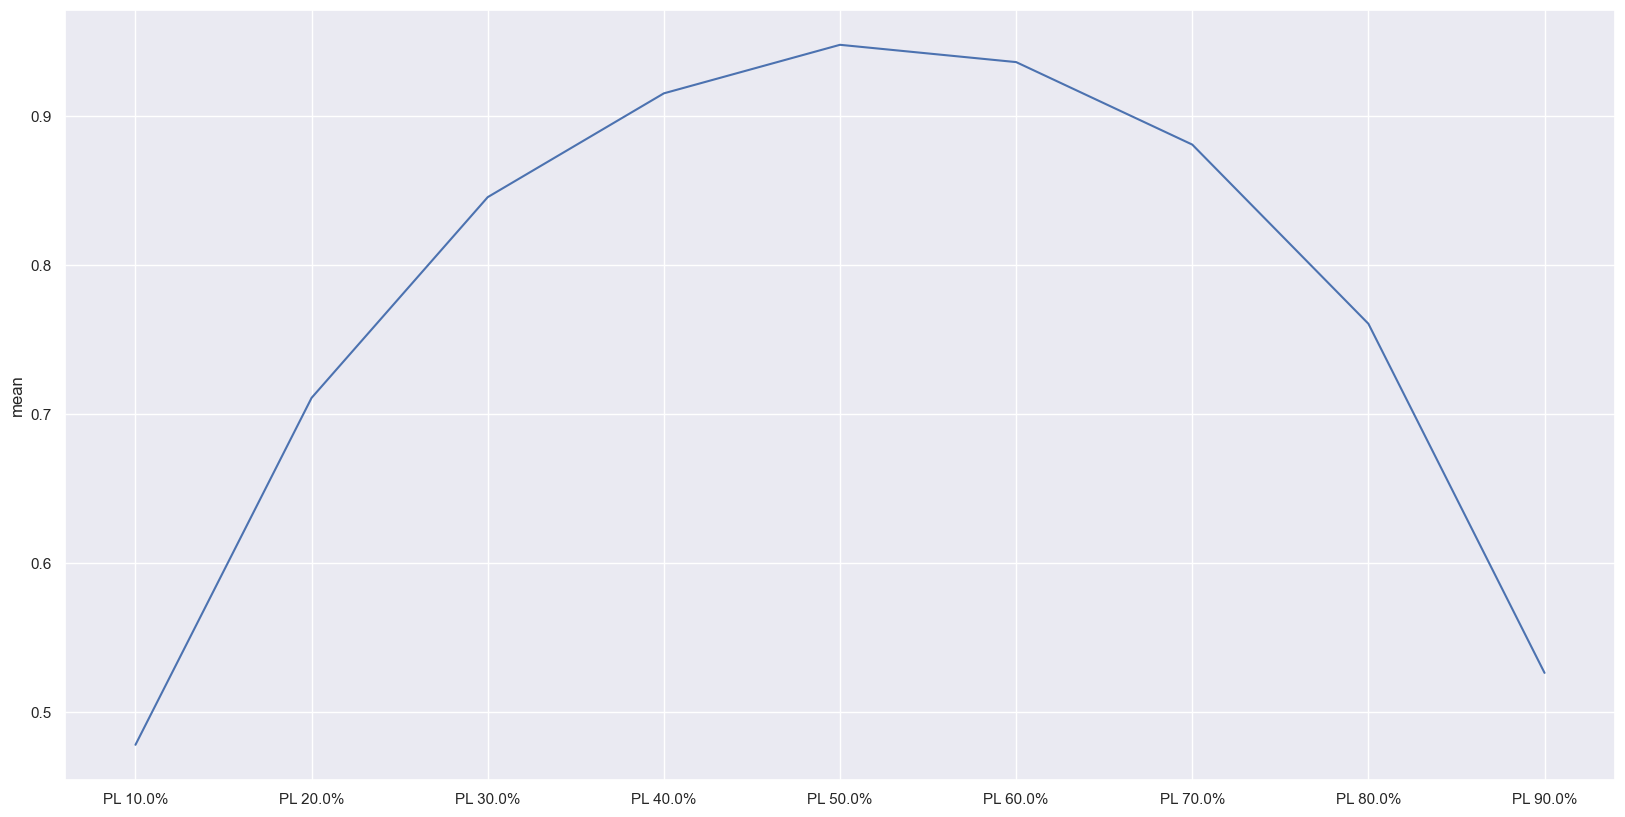

In [288]:
sns.lineplot(df_test.index, df_test['mean'])

# Simulation of AR(1) process and comparing with every garch_model - WIP